In [1]:
from writhe_tools.md_tools import canonical_residues, get_residues
from writhe_tools.utils import lsdir
import mdtraj as md
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

# new OOP frameworks
import tools
from tools import Aromatics, HBonds, rm_index

def fill(x, index, val):
    x[:, index] = val
    return x

[writhe_tools] ⏭️ Skipping 'graph_utils' (missing: torch_geometric)
[writhe_tools] 👉 To enable this module, install: pip install writhe-tools[graph]


In [9]:
files = lsdir('/home/t/Downloads', 'Tau5R2R3')
traj = md.load(files[0], top=files[1])
print(files)

['/home/t/Downloads/Tau5R2R3_1AA.xtc', '/home/t/Downloads/Tau5R2R3_1AA.pdb']


In [3]:
sequence, ca_index = get_residues(traj)
not_proline = ~np.isin(rm_index(sequence[ca_index]), ['PRO'])

hbond_class = HBonds(traj)
groups = [canonical_residues, ['LIG']]
# get ligand as donor and acceptor
# angles also has distance inside last dim
angles = [hbond_class.angles_between_groups(donor_group=i, acceptor_group=j) for i,j in zip(groups, groups[::-1])]

max(Total HBonds) before taking the mean : True
max(Total HBonds) before taking the mean : 4
max(Total HBonds) before taking the mean : 4


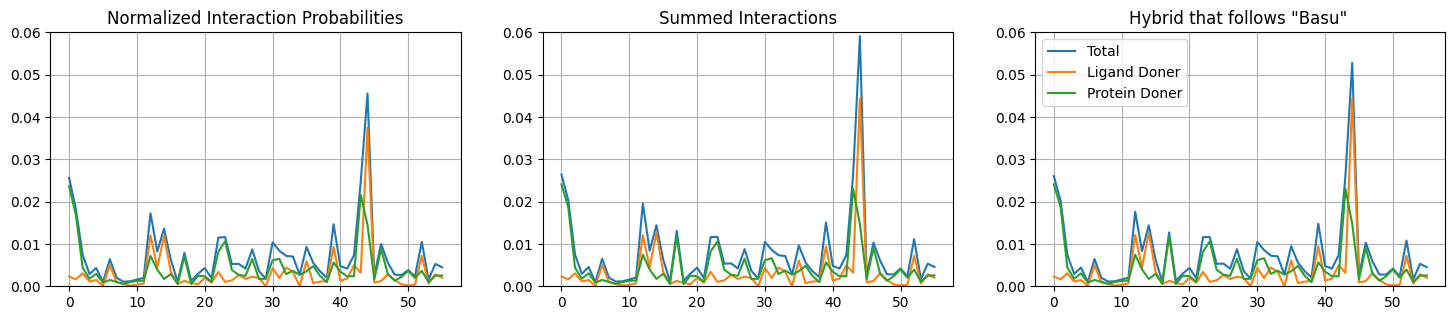

In [20]:
# HYPER-PARAMETERS TO PLAY WITH (without recomputing angles and distances)
####################
def hbond_def(theta, distance):
    return (theta < np.pi / 6) & (distance < 0.35)
aggr = np.sum # aggregation of interactions
bit = True # bit wise to match 'Basu' (difficult to justify this / see the rational with the code refactored cleanly)
###################
titles = ['Normalized Interaction Probabilities', 'Summed Interactions', 'Hybrid that follows "Basu" ']
inputs = [(np.any, np.sum, np.sum),(False, False, True)]
fig, axes = plt.subplots(1,3,figsize=(18, 3.3))

for title, ax, aggr, bit in zip(titles,axes.flat, *inputs):

    hbonds = [hbond_class.hbonds_between_groups(args=i, criteria=hbond_def, aggr=aggr)[0].T for i in angles]
    # PRO can't accept, so fill zeros to match dims
    hbonds[0] = fill(np.zeros_like(hbonds[1]), not_proline, hbonds[0])
    
    total = hbonds[0] | hbonds[1] if bit else np.logical_or(*hbonds) if aggr == np.any else np.add.reduce(hbonds)
    print(f'max(Total HBonds) before taking the mean : {total.max()}')



    for i, l in zip((total, hbonds[0], hbonds[1]), 'Total,Ligand Doner,Protein Doner'.split(',')):
        ax.plot(i.mean(0), label=l)

    ax.set_title(title)
    ax.set_ylim(0,.06)
    ax.grid()

ax.legend()
#plt.title('Normalized Interaction Probabilities')


In [24]:
# Fully indexed pair-wise interactions

In [25]:
for i, l in zip(angles, 'protein.ligand'.split('.')):
    print(f'{l} Doner Pairs', i[-1])

protein Doner Pairs [['LEU:1' 'LIG:58:0']
 ['LEU:1' 'LIG:58:1']
 ['LEU:1' 'LIG:58:2']
 ['LEU:1' 'LIG:58:3']
 ['LEU:1' 'LIG:58:4']
 ['ASP:2' 'LIG:58:0']
 ['ASP:2' 'LIG:58:1']
 ['ASP:2' 'LIG:58:2']
 ['ASP:2' 'LIG:58:3']
 ['ASP:2' 'LIG:58:4']
 ['TYR:3:0' 'LIG:58:0']
 ['TYR:3:0' 'LIG:58:1']
 ['TYR:3:0' 'LIG:58:2']
 ['TYR:3:0' 'LIG:58:3']
 ['TYR:3:0' 'LIG:58:4']
 ['TYR:3:1' 'LIG:58:0']
 ['TYR:3:1' 'LIG:58:1']
 ['TYR:3:1' 'LIG:58:2']
 ['TYR:3:1' 'LIG:58:3']
 ['TYR:3:1' 'LIG:58:4']
 ['GLY:4' 'LIG:58:0']
 ['GLY:4' 'LIG:58:1']
 ['GLY:4' 'LIG:58:2']
 ['GLY:4' 'LIG:58:3']
 ['GLY:4' 'LIG:58:4']
 ['SER:5:0' 'LIG:58:0']
 ['SER:5:0' 'LIG:58:1']
 ['SER:5:0' 'LIG:58:2']
 ['SER:5:0' 'LIG:58:3']
 ['SER:5:0' 'LIG:58:4']
 ['SER:5:1' 'LIG:58:0']
 ['SER:5:1' 'LIG:58:1']
 ['SER:5:1' 'LIG:58:2']
 ['SER:5:1' 'LIG:58:3']
 ['SER:5:1' 'LIG:58:4']
 ['ALA:6' 'LIG:58:0']
 ['ALA:6' 'LIG:58:1']
 ['ALA:6' 'LIG:58:2']
 ['ALA:6' 'LIG:58:3']
 ['ALA:6' 'LIG:58:4']
 ['TRP:7:0' 'LIG:58:0']
 ['TRP:7:0' 'LIG:58:1']
 ['TRP:7:0' 